In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cfx_sr_gwas_filtered_unitigs.Rtab
/kaggle/input/azm_sr_gwas_filtered_unitigs.Rtab
/kaggle/input/metadata.csv
/kaggle/input/cip_sr_gwas_filtered_unitigs.Rtab


## Exploratory Analysis


In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cfx_sr_gwas_filtered_unitigs.Rtab
/kaggle/input/azm_sr_gwas_filtered_unitigs.Rtab
/kaggle/input/metadata.csv
/kaggle/input/cip_sr_gwas_filtered_unitigs.Rtab


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [42]:
rowread = 1000
df = pd.read_csv('/kaggle/input/metadata.csv',delimiter = ',',nrows = rowread)
df.dataframeName = "metadata.csv"
nRow,nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [43]:
df.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN


Distribution graphs (histogram/bar graph) of sampled columns:

In [20]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df,GraphShown,GraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow,nCol = df.shape
    columnNames = list(df)
    GraphRow = (nCol+GraphPerRow - 1)/GraphPerRow
    plt.figure(num=None,figsize = (6*GraphPerRow,8 * GraphRow),dpi = 80, facecolor = 'w',edgecolor = 'k')
    for i in range (min(nCol,GraphShown)):
        plt.subplot(GraphRow,GraphPerRow, i + 1)
        columnDf= df.iloc[:,i]
        if (not np.issubdtype(type(columnDf.iloc[0]),np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0,w_pad = 1.0,h_pad = 1.0)
    plt.show()
        
        
    
    
    

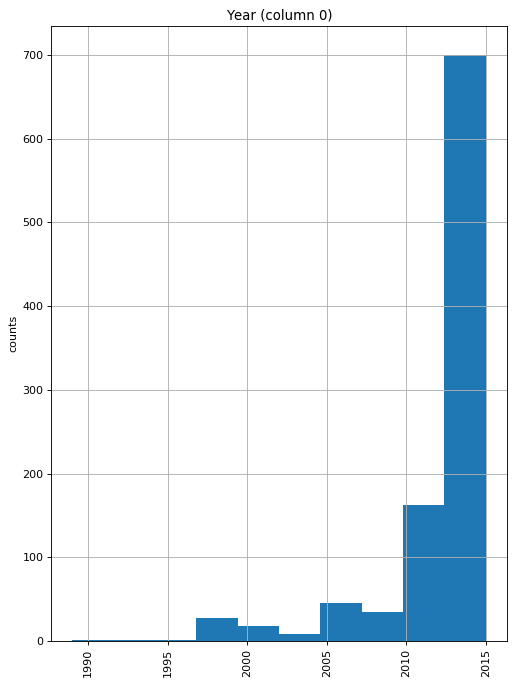

In [21]:
plotPerColumnDistribution(df, 1, 5)


Scatter and density plots:

In [37]:
def plotScatterMatrix(df,plotSize,textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10:
        columnsNames = columnNames[:10]
    df= df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha= 0.75,figsize=[plotSize,plotSize],diagonal='kde')
    corrs = df.corr().values
    for i,j in zip(*plt.np.triu_indices_from(ax,k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Dinsity plot')
    plt.show()

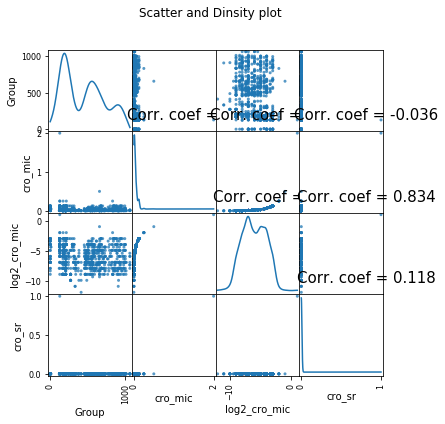

In [38]:
plotScatterMatrix(df, 6, 15)

Correlation matrix:

In [44]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


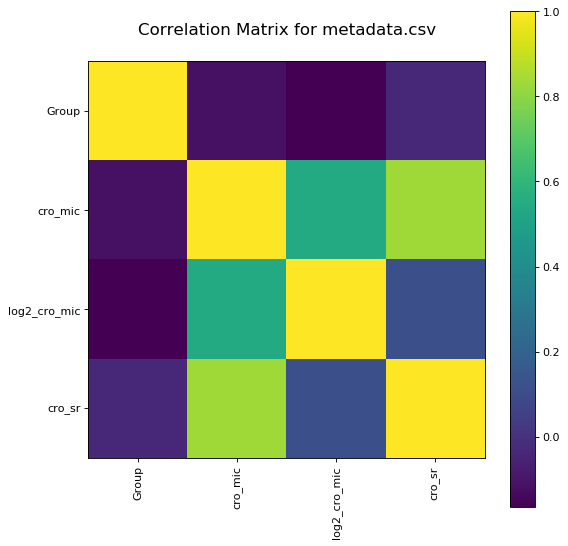

In [45]:
plotCorrelationMatrix(df, 8)